<a href="https://colab.research.google.com/github/Gilade98/Machine_Learning_Projects/blob/main/Data_Mining_BGU/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topics

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import Counter
from wordcloud import WordCloud

# Load dataset
df = pd.read_parquet("/content/drive/MyDrive/data_toolbox/gdelt_analyzed_articles/news_analysis_2022_merged.parquet")

# Convert date from string to datetime
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y-%m-%d")

# Convert topics column from string to list, ensuring lowercase
df["topics"] = df["topics"].apply(lambda x: [topic.lower() for topic in x.split(", ")] if isinstance(x, str) else [])

# Convert sentiment to numerical values
df["sentiment"] = df["sentiment"].astype(str).str.lower().str.strip()

sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Convert date to month format (YYYY-MM)
df["MONTH"] = df["DATE"].dt.to_period("M")  # Groups by month

# Flatten all topics into a single list (lowercase) and count occurrences
topic_counts = Counter([topic for topics in df["topics"] for topic in topics])

# Get the top 20 most frequently mentioned topics
top_20_topics = [topic for topic, _ in topic_counts.most_common(20)]

# Get the top 200 topics for the word cloud
top_200_topics = dict(topic_counts.most_common(200))  # Convert to dictionary (topic: count)

# Expand dataframe so each row contains a single topic for proper monthly aggregation
df_expanded = df.explode("topics")

# Keep only rows where the topic is in the top 20
df_expanded = df_expanded[df_expanded["topics"].isin(top_20_topics)]

# Compute monthly average sentiment per topic
topic_sentiment_df = df_expanded.groupby(["MONTH", "topics"])["sentiment"].mean().unstack().fillna(0)

# Convert MONTH back to string for plotting
topic_sentiment_df.index = topic_sentiment_df.index.astype(str)


In [ ]:
top_200_topics

{'real estate': 32171,
 'inflation': 17570,
 'local news': 17547,
 'education': 15668,
 'climate change': 13820,
 'politics': 11950,
 'homelessness': 11232,
 'public safety': 10283,
 'housing market': 10016,
 'international relations': 9684,
 'sports': 9380,
 'economic impact': 9288,
 'economic development': 8896,
 'interest rates': 8689,
 'urban development': 8662,
 'technology': 8554,
 'infrastructure': 8474,
 'investment': 7972,
 'crime': 7582,
 'public health': 7311,
 'affordable housing': 7288,
 'entertainment': 7152,
 'economic growth': 6927,
 'community engagement': 6901,
 'community support': 6894,
 'sustainability': 6758,
 'stock market': 6442,
 'urban planning': 6399,
 'community events': 6387,
 'local government': 6269,
 'economy': 6237,
 'weather': 6084,
 'real estate development': 5837,
 'business': 5707,
 'law enforcement': 5669,
 'community development': 5583,
 'real estate market': 5555,
 'legal proceedings': 5521,
 'tourism': 5223,
 'healthcare': 5124,
 'transportation

In [ ]:
topic_sentiment_df

topics,climate change,crime,economic development,economic impact,education,homelessness,housing market,inflation,infrastructure,interest rates,international relations,investment,local news,politics,public health,public safety,real estate,sports,technology,urban development
MONTH,,,,,,,,,,,,,,,,,,,,
2022-01,0.047720,-0.533563,0.610512,-0.158756,0.343176,0.011089,0.132879,-0.340426,0.243685,0.002257,-0.361789,0.381599,0.200470,-0.125644,-0.113532,-0.252774,0.281357,0.102273,0.244131,0.384503
2022-02,0.012771,-0.506438,0.596947,-0.325333,0.374359,-0.039474,-0.046784,-0.406098,0.261383,-0.117188,-0.452412,0.431542,0.225507,-0.185501,-0.067093,-0.373291,0.313242,0.114961,0.271062,0.366718
2022-03,0.018067,-0.481172,0.624196,-0.375514,0.358607,-0.049073,-0.009629,-0.404878,0.285714,-0.107527,-0.447119,0.308424,0.202158,-0.088025,-0.022690,-0.209774,0.293000,0.132934,0.263024,0.384000
2022-04,-0.020358,-0.581295,0.621477,-0.349754,0.379923,-0.023913,-0.103217,-0.363636,0.302391,-0.219963,-0.310989,0.550073,0.265605,-0.130233,-0.090517,-0.370062,0.314213,0.141250,0.252769,0.338422
2022-05,-0.055556,-0.499210,0.661499,-0.299279,0.386630,0.024390,-0.097837,-0.296296,0.315718,-0.233548,-0.215206,0.489521,0.259963,-0.096532,-0.125862,-0.265517,0.348475,0.118605,0.285535,0.398996
2022-06,0.045905,-0.529781,0.679707,-0.228883,0.369925,0.034949,-0.328498,-0.474110,0.291248,-0.329308,-0.247500,0.446839,0.242247,-0.140000,-0.039474,-0.283370,0.352156,0.171053,0.272977,0.393531
2022-07,-0.193077,-0.553354,0.563859,-0.319317,0.303797,-0.133574,-0.374776,-0.477049,0.194821,-0.308534,-0.303797,0.421289,0.237831,-0.158613,-0.123397,-0.390693,0.311898,0.093288,0.272727,0.403681
2022-08,-0.132579,-0.541353,0.593373,-0.347509,0.275918,-0.118037,-0.173763,-0.352465,0.222581,-0.246594,-0.273481,0.410000,0.200501,-0.146707,-0.069597,-0.312500,0.287104,0.071130,0.228346,0.406040
2022-09,-0.151745,-0.558468,0.634769,-0.362881,0.333913,-0.040816,-0.174863,-0.354772,0.146648,-0.358586,-0.203675,0.374034,0.208226,-0.173697,-0.064990,-0.261725,0.279736,0.117460,0.257457,0.334405


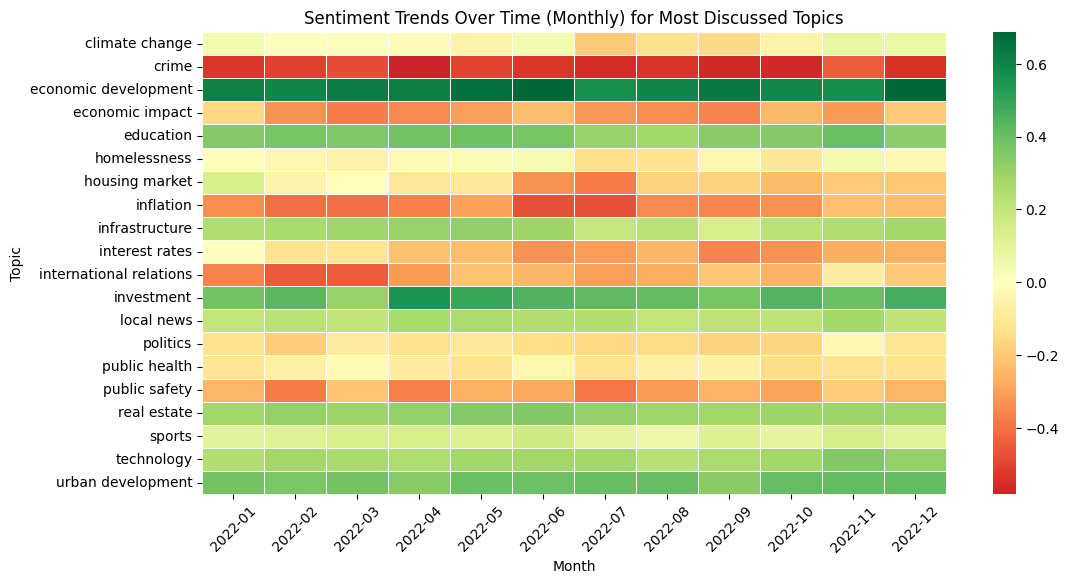

In [ ]:
# Plot heatmap aggregated by month
plt.figure(figsize=(12, 6))
sns.heatmap(topic_sentiment_df.T, cmap="RdYlGn", center=0, linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Topic")
plt.title("Sentiment Trends Over Time (Monthly) for Most Discussed Topics")
plt.xticks(rotation=45)
plt.show()


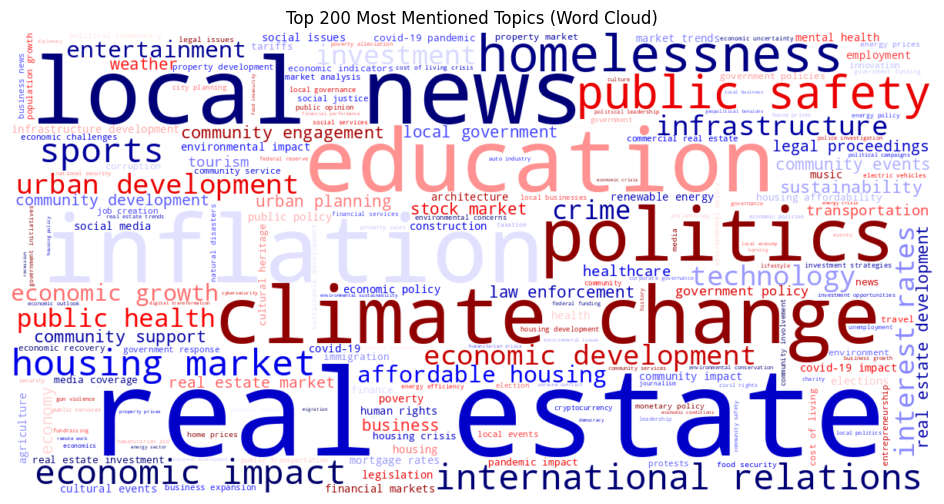

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="seismic").generate_from_frequencies(top_200_topics)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 200 Most Mentioned Topics (Word Cloud)")
plt.show()


Entities

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import Counter
from wordcloud import WordCloud

# Load dataset
df = pd.read_parquet("/content/drive/MyDrive/data_toolbox/gdelt_analyzed_articles/news_analysis_2022_merged.parquet")

# Convert date from string to datetime
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y-%m-%d")

# Convert entities column from string to list, ensuring lowercase
df["entities"] = df["entities"].apply(lambda x: [entity.lower() for entity in x.split(", ")] if isinstance(x, str) else [])

# Convert sentiment to numerical values
df["sentiment"] = df["sentiment"].astype(str).str.lower().str.strip()

sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Convert date to month format (YYYY-MM)
df["MONTH"] = df["DATE"].dt.to_period("M")  # Groups by month

# Flatten all entities into a single list (lowercase) and count occurrences
entity_counts = Counter([entity for entities in df["entities"] for entity in entities])

# Get the top 20 most frequently mentioned entities
top_20_entities = [entity for entity, _ in entity_counts.most_common(20)]

# Get the top 200 entities for the word cloud
top_200_entities = dict(entity_counts.most_common(200))  # Convert to dictionary (entity: count)

# Expand dataframe so each row contains a single entity for proper monthly aggregation
df_expanded = df.explode("entities")

# Keep only rows where the entity is in the top 20
df_expanded = df_expanded[df_expanded["entities"].isin(top_20_entities)]

# Compute monthly average sentiment per entity
entity_sentiment_df = df_expanded.groupby(["MONTH", "entities"])["sentiment"].mean().unstack().fillna(0)

# Convert MONTH back to string for plotting
entity_sentiment_df.index = entity_sentiment_df.index.astype(str)


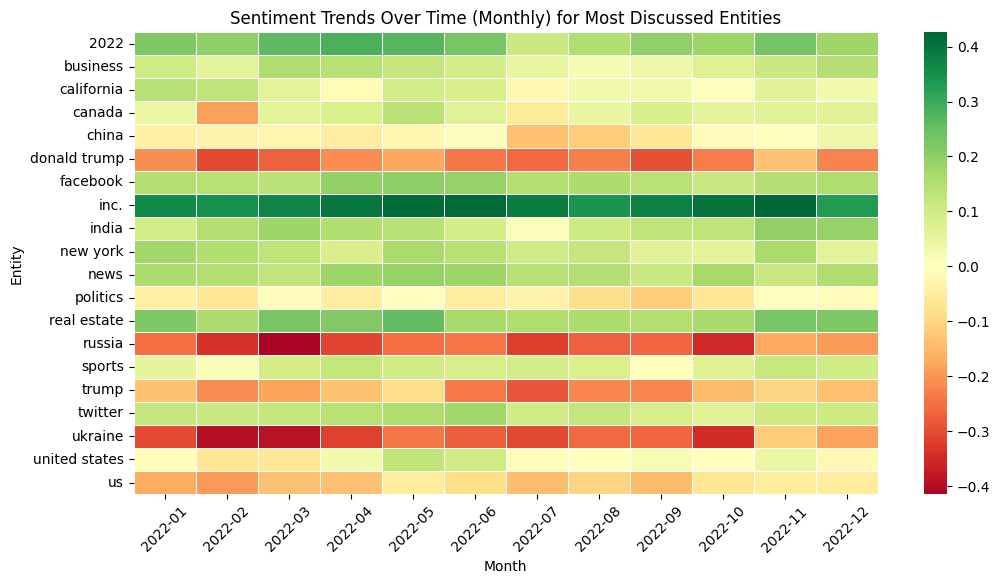

In [ ]:
# Plot heatmap aggregated by month
plt.figure(figsize=(12, 6))
sns.heatmap(entity_sentiment_df.T, cmap="RdYlGn", center=0, linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Entity")
plt.title("Sentiment Trends Over Time (Monthly) for Most Discussed Entities")
plt.xticks(rotation=45)
plt.show()


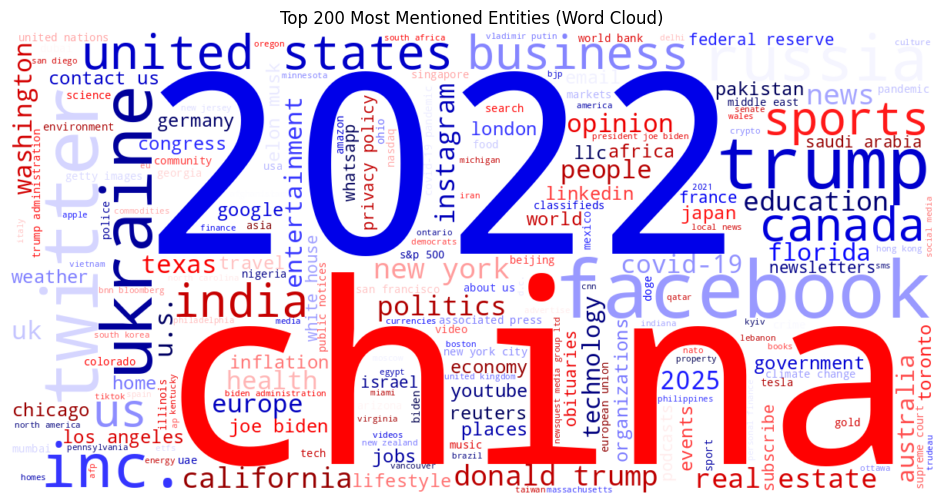

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="seismic").generate_from_frequencies(top_200_entities)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 200 Most Mentioned Entities (Word Cloud)")
plt.show()


Monthly Distribution and Sentiment

In [ ]:
import pandas as pd
df = pd.read_parquet("/content/drive/MyDrive/data_toolbox/gdelt_analyzed_articles/news_analysis_2022_merged.parquet")

# Ensure DATE column is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Convert all sentiment values to lowercase for consistency
df["sentiment"] = df["sentiment"].astype(str).str.lower().str.strip()

# Define sentiment mapping
sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}

# Replace text labels with numeric values
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Fill missing sentiment values with 0 (Neutral)
df["sentiment"] = df["sentiment"].fillna(0).astype(float)  # Convert to float

# Ensure 'prediction' column is numeric
df["prediction"] = pd.to_numeric(df["prediction"], errors="coerce").fillna(0)

# Aggregate number of articles and average sentiment per month
monthly_data = df.groupby(df["DATE"].dt.to_period("M")).agg({
    "sentiment": "mean",  # Compute average sentiment per month
    "prediction": "count"  # Count number of articles per month
}).reset_index()

# Convert 'Month' to datetime for plotting
monthly_data["Month"] = monthly_data["DATE"].dt.to_timestamp()

# Rename columns
# monthly_data.columns = ["Month", "Average Sentiment", "Article Count"]

# Verify output
print(monthly_data.head(12))  # Should show valid numbers now!


       DATE  sentiment  prediction      Month
0   2022-01   0.158797       24081 2022-01-01
1   2022-02   0.128785       22091 2022-02-01
2   2022-03   0.152851       27432 2022-03-01
3   2022-04   0.156313       26690 2022-04-01
4   2022-05   0.173096       27505 2022-05-01
5   2022-06   0.174107       26880 2022-06-01
6   2022-07   0.112466       26497 2022-07-01
7   2022-08   0.112167       24410 2022-08-01
8   2022-09   0.120428       22802 2022-09-01
9   2022-10   0.135761       26392 2022-10-01
10  2022-11   0.172559       23308 2022-11-01
11  2022-12   0.148845       23548 2022-12-01


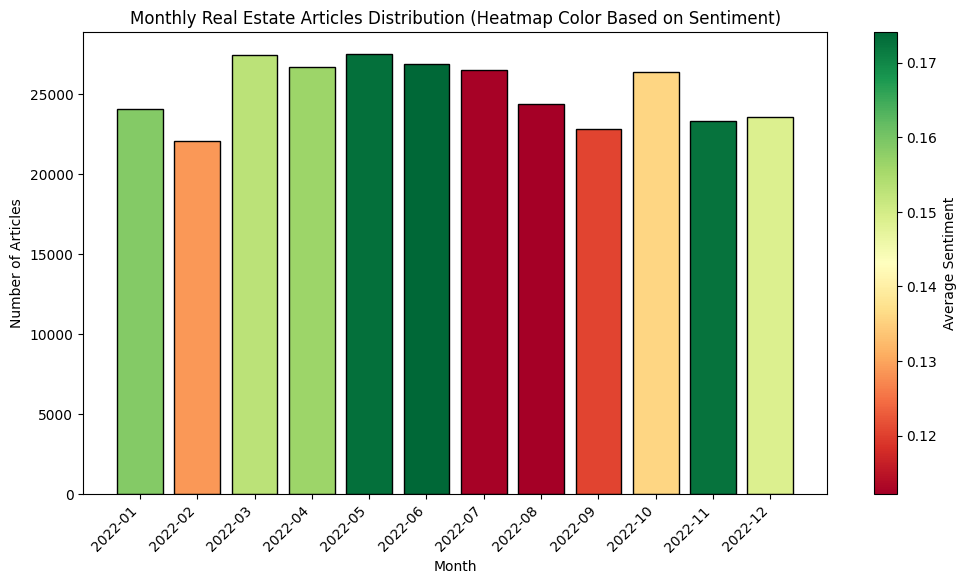

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Normalize sentiment values for colormap
norm = mcolors.Normalize(vmin=monthly_data["sentiment"].min(), vmax=monthly_data["sentiment"].max())

# Choose a heatmap colormap (Red → Yellow → Green)
colormap = plt.colormaps.get_cmap("RdYlGn")

# Generate colors for each bar based on sentiment
colors = [colormap(norm(val)) for val in monthly_data["sentiment"]]

# Create figure & axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart (with explicitly assigned colors)
bars = ax.bar(
    monthly_data["Month"].dt.strftime('%Y-%m'),  # Format month labels
    monthly_data["prediction"],
    color=colors,  # Explicitly assign colors per bar
    edgecolor="black",  # Keep edge visible
    alpha=1.0,  # Ensure full color intensity
    width=0.8
)

# Rotate X-axis labels for readability
ax.set_xticks(range(len(monthly_data["Month"])))
ax.set_xticklabels(monthly_data["Month"].dt.strftime('%Y-%m'), rotation=45, ha="right")

# Add labels
ax.set_xlabel("Month")
ax.set_ylabel("Number of Articles")
ax.set_title("Monthly Real Estate Articles Distribution (Heatmap Color Based on Sentiment)")

# Add colorbar (Properly linked)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Average Sentiment")

# Show plot
plt.show()


In [ ]:
import pandas as pd
df = pd.read_parquet("/content/drive/MyDrive/data_toolbox/gdelt_analyzed_articles/news_analysis_2022_merged.parquet")

# Ensure DATE column is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Convert all sentiment values to lowercase for consistency
df["sentiment"] = df["sentiment"].astype(str).str.lower().str.strip()

# Define sentiment mapping
sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}

# Replace text labels with numeric values
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Fill missing sentiment values with 0 (Neutral)
df["sentiment"] = df["sentiment"].fillna(0).astype(float)  # Convert to float

# Ensure 'prediction' column is numeric
df["prediction"] = pd.to_numeric(df["prediction"], errors="coerce").fillna(0)

# Add a Month column for grouping and visualization
df["Month"] = df["DATE"].dt.to_period("M").astype(str)


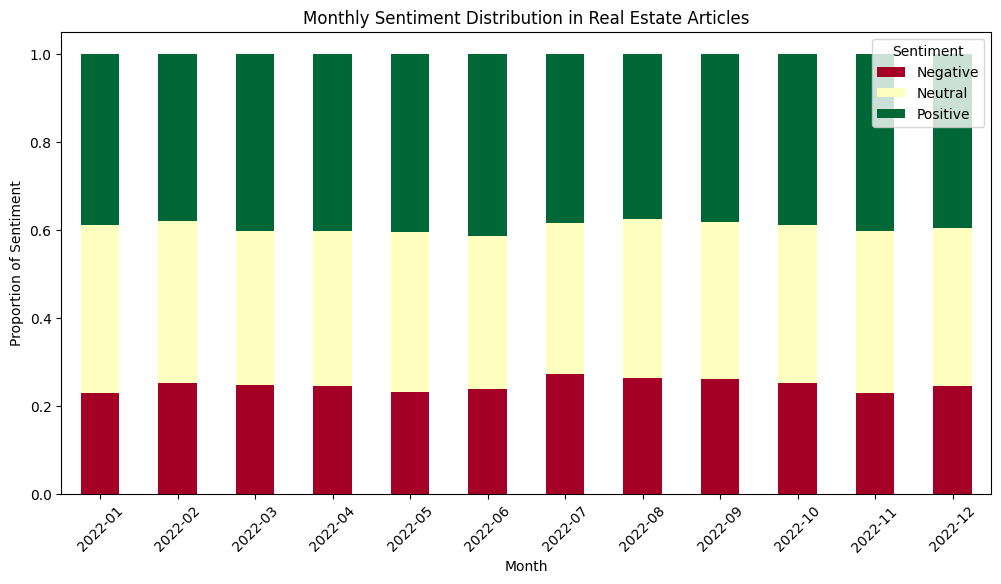

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment occurrences per month
sentiment_distribution = df.groupby([df["DATE"].dt.to_period("M"), "sentiment"]).size().unstack(fill_value=0)

# Normalize to get proportions
sentiment_proportion = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0)

# Plot stacked bar chart
sentiment_proportion.plot(kind="bar", stacked=True, figsize=(12,6), colormap="RdYlGn")

plt.xlabel("Month")
plt.ylabel("Proportion of Sentiment")
plt.title("Monthly Sentiment Distribution in Real Estate Articles")
plt.xticks(rotation=45)
plt.legend(["Negative", "Neutral", "Positive"], title="Sentiment")
plt.show()


Geographic Sentiment of Prediction

In [ ]:
!pip install geonamescache textblob plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 6.1 MB/s eta 0:00:00


In [ ]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geonamescache
from textblob import TextBlob
import plotly.express as px

df = pd.read_parquet("/content/drive/MyDrive/data_toolbox/gdelt_analyzed_articles/news_analysis_2022_merged.parquet")
df = df.dropna(subset=["entities"])

nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "lemmatizer","attribute_ruler"])

# We'll store all the recognized location entities in a new list
all_locations = []

# Prepare your text data as a list (the column that contains the text you want to parse for location)
text_list = df["entities"].tolist()

# nlp.pipe can take a batch_size parameter
#   - Increase batch_size if you have enough RAM & GPU, otherwise keep moderate (e.g., 100-1000)
#   - disable=["textcat"] if your model includes a textcat pipeline and you don't need it
for doc in nlp.pipe(text_list, batch_size=1024):
    # For each Doc object, collect all GPE/LOC entities
    locs = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]
    all_locations.append(locs)

# Now we have a list of location-entity lists, parallel in order to df rows
df["extracted_locations"] = all_locations







In [ ]:
df["extracted_locations"].head()

,extracted_locations
0,"[Dubai, UAE, RTA, Saudi Arabia, Israel]"
1,"[Chicago, Chicago, Indio]"
2,"[Belfast, North Belfast Presbytery, Northern I..."
3,"[Greece, Athens, Forbes, Ekathimerini, China, EU]"
4,[Leamington]


In [ ]:
gc = geonamescache.GeonamesCache()
cities_data = gc.get_cities()
countries_data = gc.get_countries()

city_to_country = {}
for _, info in cities_data.items():
    city_name = info["name"].strip().lower()       # e.g. "berlin"
    iso2_code = info["countrycode"].upper()        # e.g. "DE"
    if iso2_code in countries_data:
        country_name = countries_data[iso2_code]["name"]  # e.g. "Germany"
        city_to_country[city_name] = country_name

In [ ]:
def offline_map_locations_to_country(loc_list):
    """
    Attempts to convert a list of location tokens to a list of
    full country names (e.g. ["Germany", "United States"]).
    """
    result = set()
    for loc in loc_list:
        loc_stripped = loc.strip()
        loc_lower = loc_stripped.lower()
        loc_upper = loc_stripped.upper()

        # If recognized as a city in geonamescache
        if loc_lower in city_to_country:
            result.add(city_to_country[loc_lower])
            continue

        # If it's an ISO2 code (e.g. "US", "DE", "GB", "FR")
        if loc_upper in countries_data:
            c_name = countries_data[loc_upper]["name"]
            result.add(c_name)
            continue

        # (c) If it's already a full country name (e.g. "Germany", "France")
        for iso2, cinfo in countries_data.items():
            if cinfo["name"].strip().lower() == loc_lower:
                result.add(cinfo["name"])
                break

    return list(result)

df["country_names"] = df["extracted_locations"].apply(offline_map_locations_to_country)

In [ ]:
df["country_names"].head()

,country_names
0,"[United Arab Emirates, Saudi Arabia, Israel]"
1,[United States]
2,[United Kingdom]
3,"[China, Greece, United States]"
4,[Canada]


In [ ]:
df = df.dropna(subset=["prediction"])
df["sentiment_score"] = df["prediction"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_score"].head()

,sentiment_score
0,0.081818
1,0.068182
2,0.081818
3,0.058081
4,0.212121


In [ ]:
df_exploded = df.explode("country_names", ignore_index=True)
df_exploded = df_exploded.dropna(subset=["country_names"])

df_country_sent = (
    df_exploded.groupby("country_names", as_index=False)["sentiment_score"]
    .mean()
    .rename(columns={"country_names": "country"})
)


In [ ]:
# Ensure DATE is in datetime format
df_exploded["DATE"] = pd.to_datetime(df_exploded["DATE"])

# Extract 'Year-Month' for grouping
df_exploded["Year-Month"] = df_exploded["DATE"].dt.to_period("M").astype(str)

# Group by Country and Month, calculating mean sentiment
df_country_monthly = (
    df_exploded.groupby(["country_names", "Year-Month"], as_index=False)
    .agg(mean_sentiment=("sentiment_score", "mean"))
    .rename(columns={"country_names": "country"})
)
df_country_monthly.head()

,country,Year-Month,mean_sentiment
0,Afghanistan,2022-01,0.029459
1,Afghanistan,2022-02,0.053868
2,Afghanistan,2022-03,0.051497
3,Afghanistan,2022-04,0.055282
4,Afghanistan,2022-05,0.054049


In [ ]:
df_country_sent.head(10)

,country,sentiment_score
0,Afghanistan,0.047022
1,Aland Islands,0.141788
2,Albania,0.091987
3,Algeria,0.059508
4,American Samoa,0.166667
5,Andorra,0.117844
6,Angola,0.063406
7,Anguilla,0.062218
8,Antarctica,0.082971
9,Argentina,0.059032


In [ ]:
fig = px.choropleth(
    df_country_sent,
    locations="country",
    locationmode="country names",  # must be "country names" if using full spelled-out names
    color="sentiment_score",
    hover_name="country",
    color_continuous_scale="RdYlGn",
    title="Real Estate Sentiment Per Country",
    range_color=(-0.1, 0.1)
)
fig.show()

In [ ]:
fig = px.choropleth(
    df_country_monthly,
    locations="country",
    locationmode="country names",
    color="mean_sentiment",
    hover_name="country",
    animation_frame="Year-Month",  # This enables monthly animation
    color_continuous_scale="RdYlGn",
    title="Real Estate Sentiment Per Country (Monthly)",
    range_color=(-0.1, 0.1)
)
fig.show()
